STAT 451: Machine Learning (Fall 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

# L05 - Data Preprocessing and Machine Learning with Scikit-Learn

# 5.4 Machine Learning with Scikit-learn 

## The Scikit-Learn Estimator API

- Below is an overview of the scikit-learn estimator API, which is used for implementing classification and regression models/algorithms.
- We have seen the methods in the context of the *k*NN implementation earlier; however, one interesting, additional method we have not covered yet is `score`.
- The `score` method simply runs `predict` on the features (`X`) internally and then computes the performance by comparing the predicted targets to the true targets `y`.
- In the case of classification models, the `score` method computes the classification accuracy (in the range [0, 1]) -- i.e., the proportion of correctly predicted labels.
In the case of regression models, the `score` method computes the coefficient of determination ($R^2$).

```python
class SupervisedEstimator(...):
    
    def __init__(self, hyperparam_1, ...):
        self.hyperparm_1
        ...
    
    def fit(self, X, y):
        ...
        self.fit_attribute_
        return self
    
    def predict(self, X):
        ...
        return y_pred
    
    def score(self, X, y):
        ...
        return score
    
    def _private_method(self):
        ...
    ...
    
```

- The graphic below summarizes the useage of the `SupervisedEstimator` API that scikit-learn uses for implementing classification and regression algorithms/models.

<img src="images/estimator-api.png" alt="drawing" width="250"/>

- For 2D datasets (which we usually only have in teaching/learning contexts), we can plot the decision regions using a convenient wrapper function in  mlxtend as shown below.

In [1]:
# Code repeated from 5-2-basic-data-handling.ipynb

import pandas as pd
import numpy as np


df = pd.read_csv('data/iris.csv')

d = {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}
df['Species'] = df['Species'].map(d)

X = df.iloc[:, 1:5].values
y = df['Species'].values

indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)

train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]

print(f'X_train.shape: {X_train.shape}')
print(f'X_valid.shape: {X_valid.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (97, 4)
X_valid.shape: (22, 4)
X_test.shape: (31, 4)


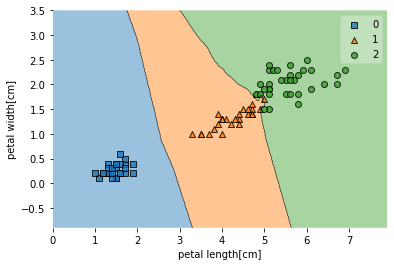

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:, 2:], y_train)
plot_decision_regions(X_train[:, 2:], y_train, knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.savefig('images/decisionreg.pdf')
plt.show()